In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
titanic.head()

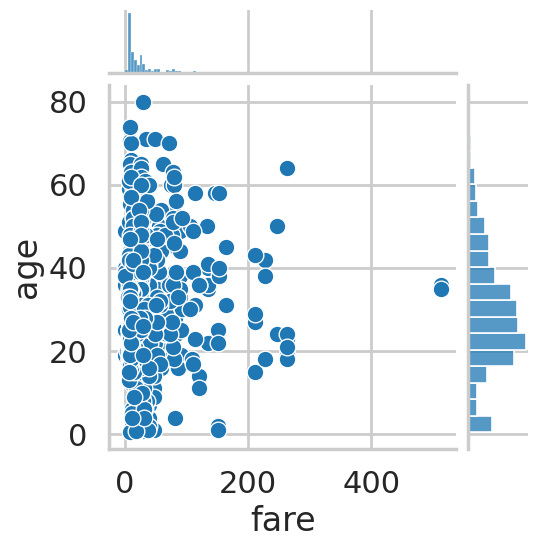

In [ ]:
sns.jointplot(x='fare',y='age',data=titanic)

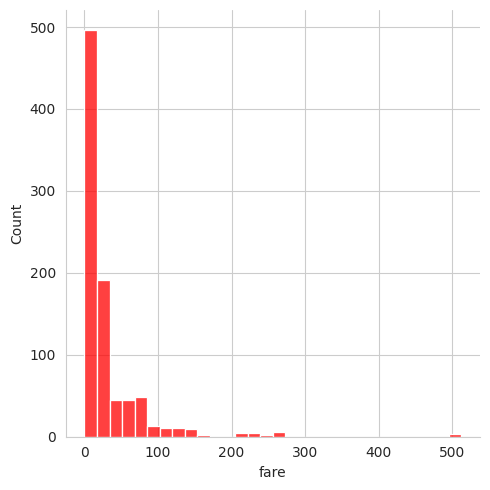

In [ ]:
sns.displot(titanic['fare'],kde=False,bins=30, color='red')

sns.jointplot(x='fare',y='age',data=titanic)

In [ ]:
#sns.barplot(x='sex',y='age', data=titanic,estimator=np.std)

<ipython-input-39-0a392420a558>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=titanic,palette='rainbow')


<Axes: xlabel='sex', ylabel='count'>

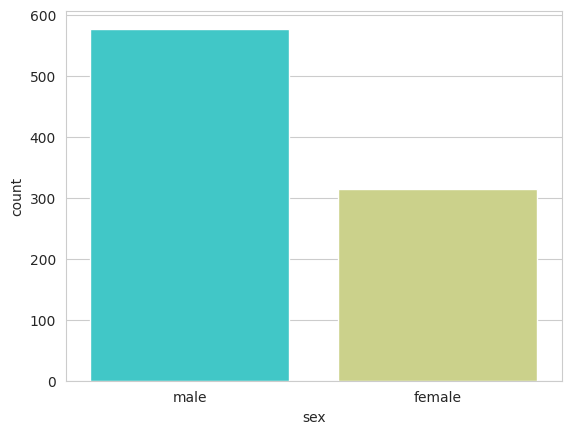

In [ ]:
sns.countplot(x='sex',data=titanic,palette='rainbow')

<ipython-input-40-972829054d65>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')


<Axes: xlabel='class', ylabel='age'>

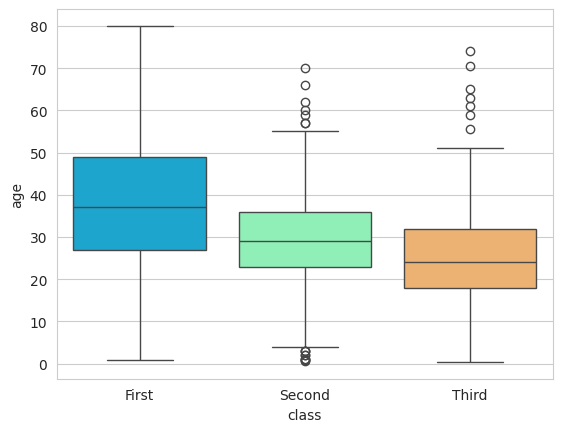

In [ ]:
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

<ipython-input-69-6992bfcf7342>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='class',y='age',data=titanic,palette='rainbow')


<Axes: xlabel='class', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


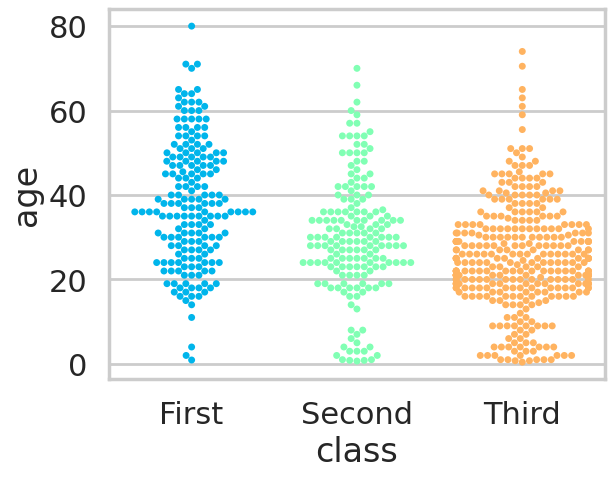

In [ ]:
#sns.stripplot(x='class',y='age',data=titanic,jitter=True,palette='rainbow')
sns.swarmplot(x='class',y='age',data=titanic,palette='rainbow')


In [ ]:
#sns.heatmap(titanic.corr(),cmap='coolwarm')
#plt.title('titanic.corr()')

In [ ]:
g = sns.FacetGrid(data=titanic,col='sex')
g.map(sns.dis,'age')

<Axes: xlabel='fare', ylabel='Density'>

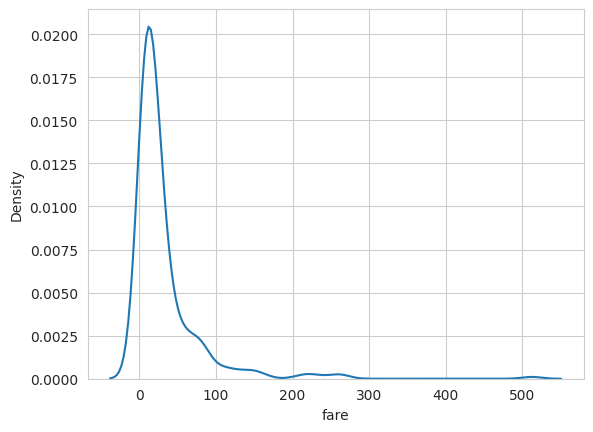

In [ ]:
sns.kdeplot(titanic['fare'])

(0.0, 1.0)

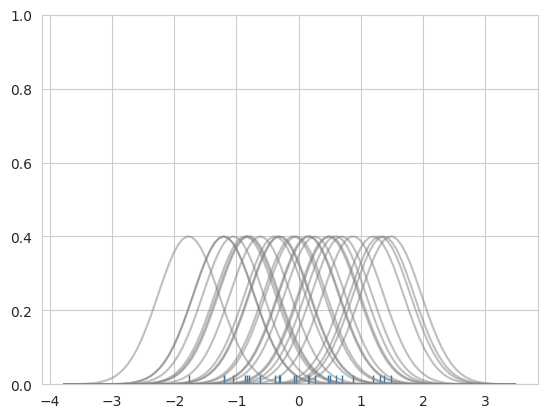

In [ ]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:

    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

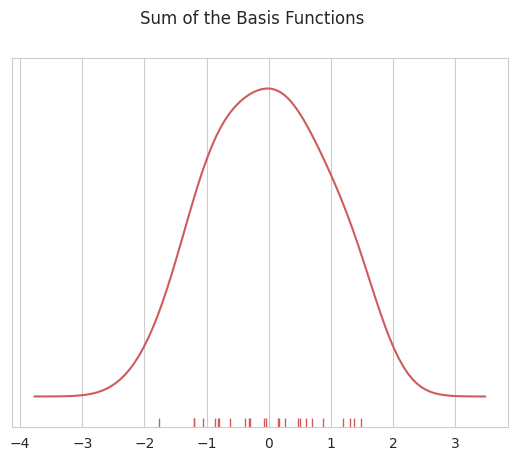

In [ ]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='fare'>

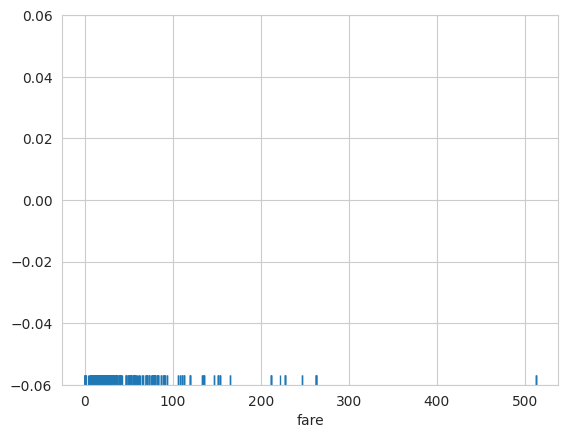

In [ ]:
sns.rugplot(titanic['fare'])

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figur

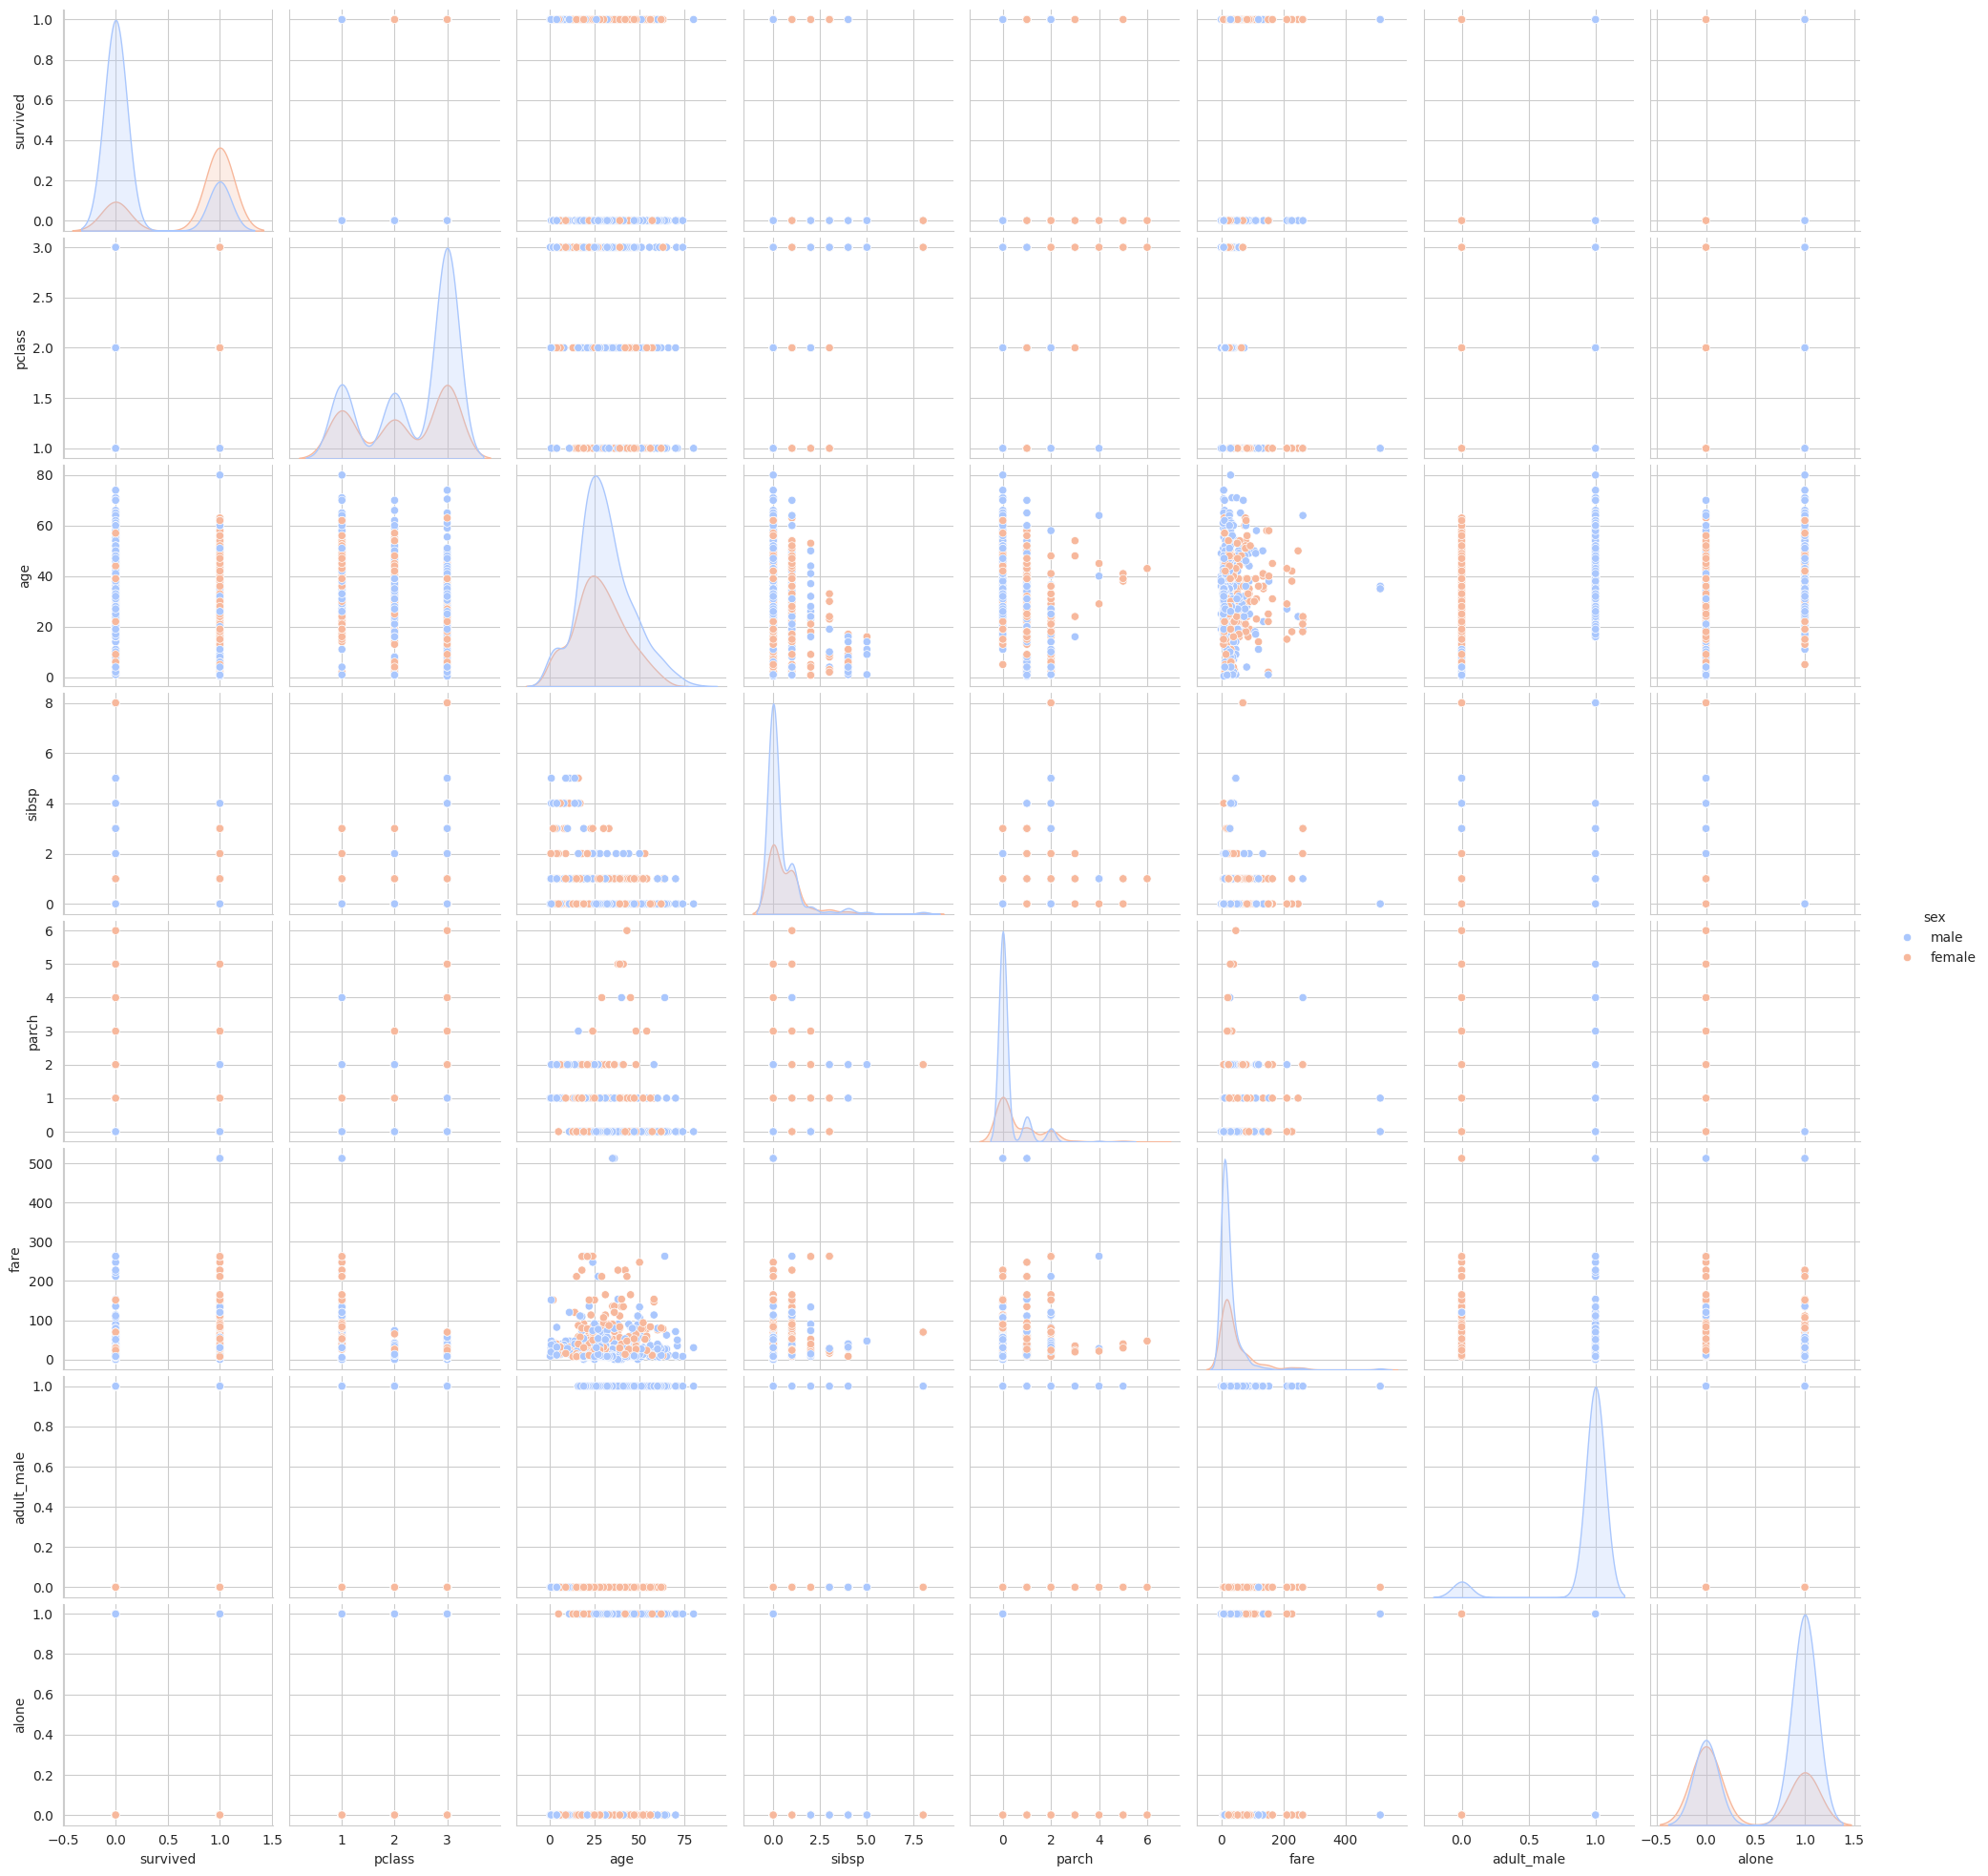

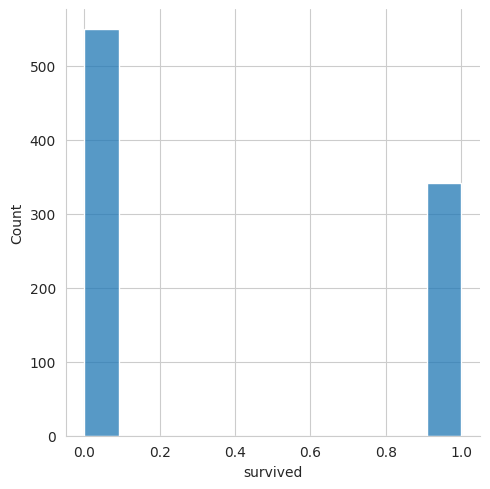

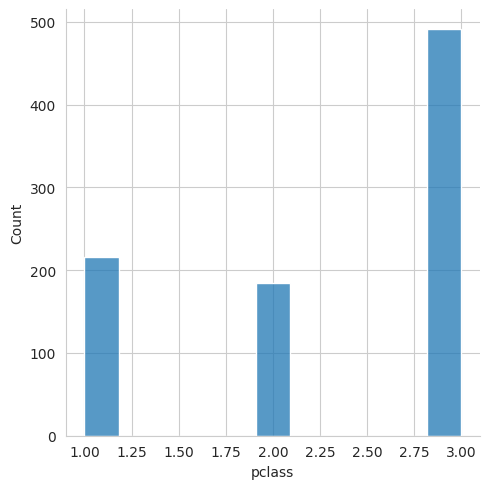

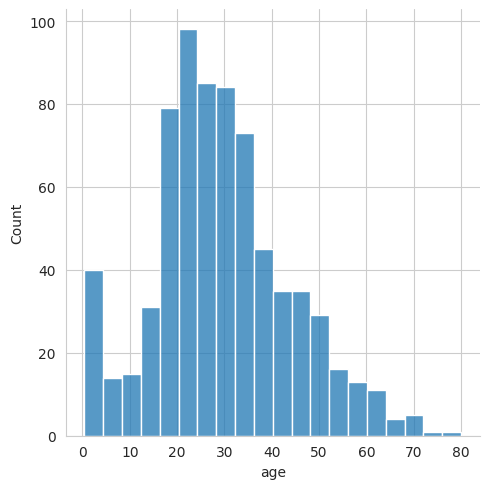

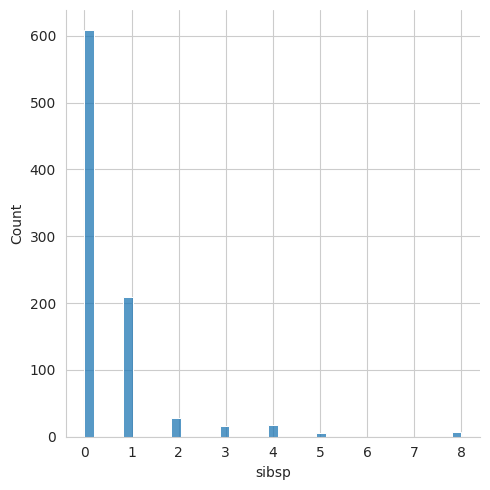

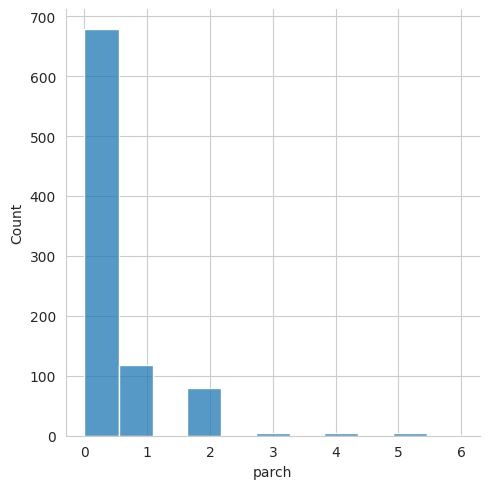

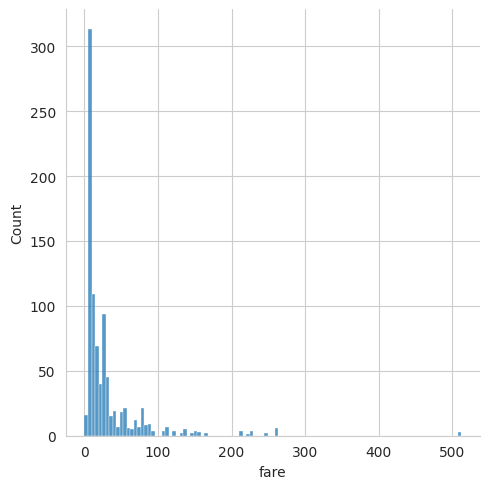

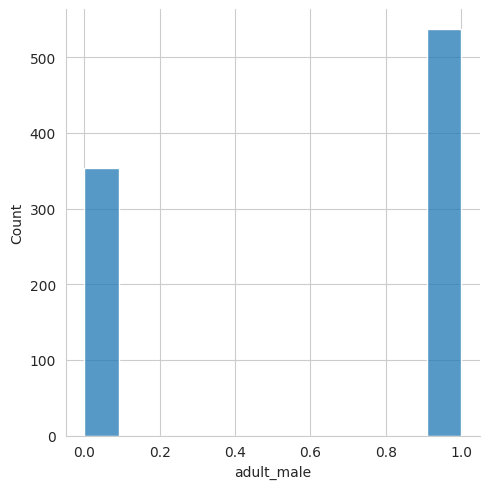

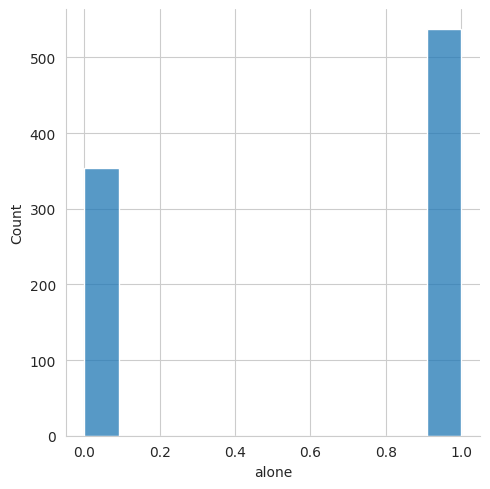

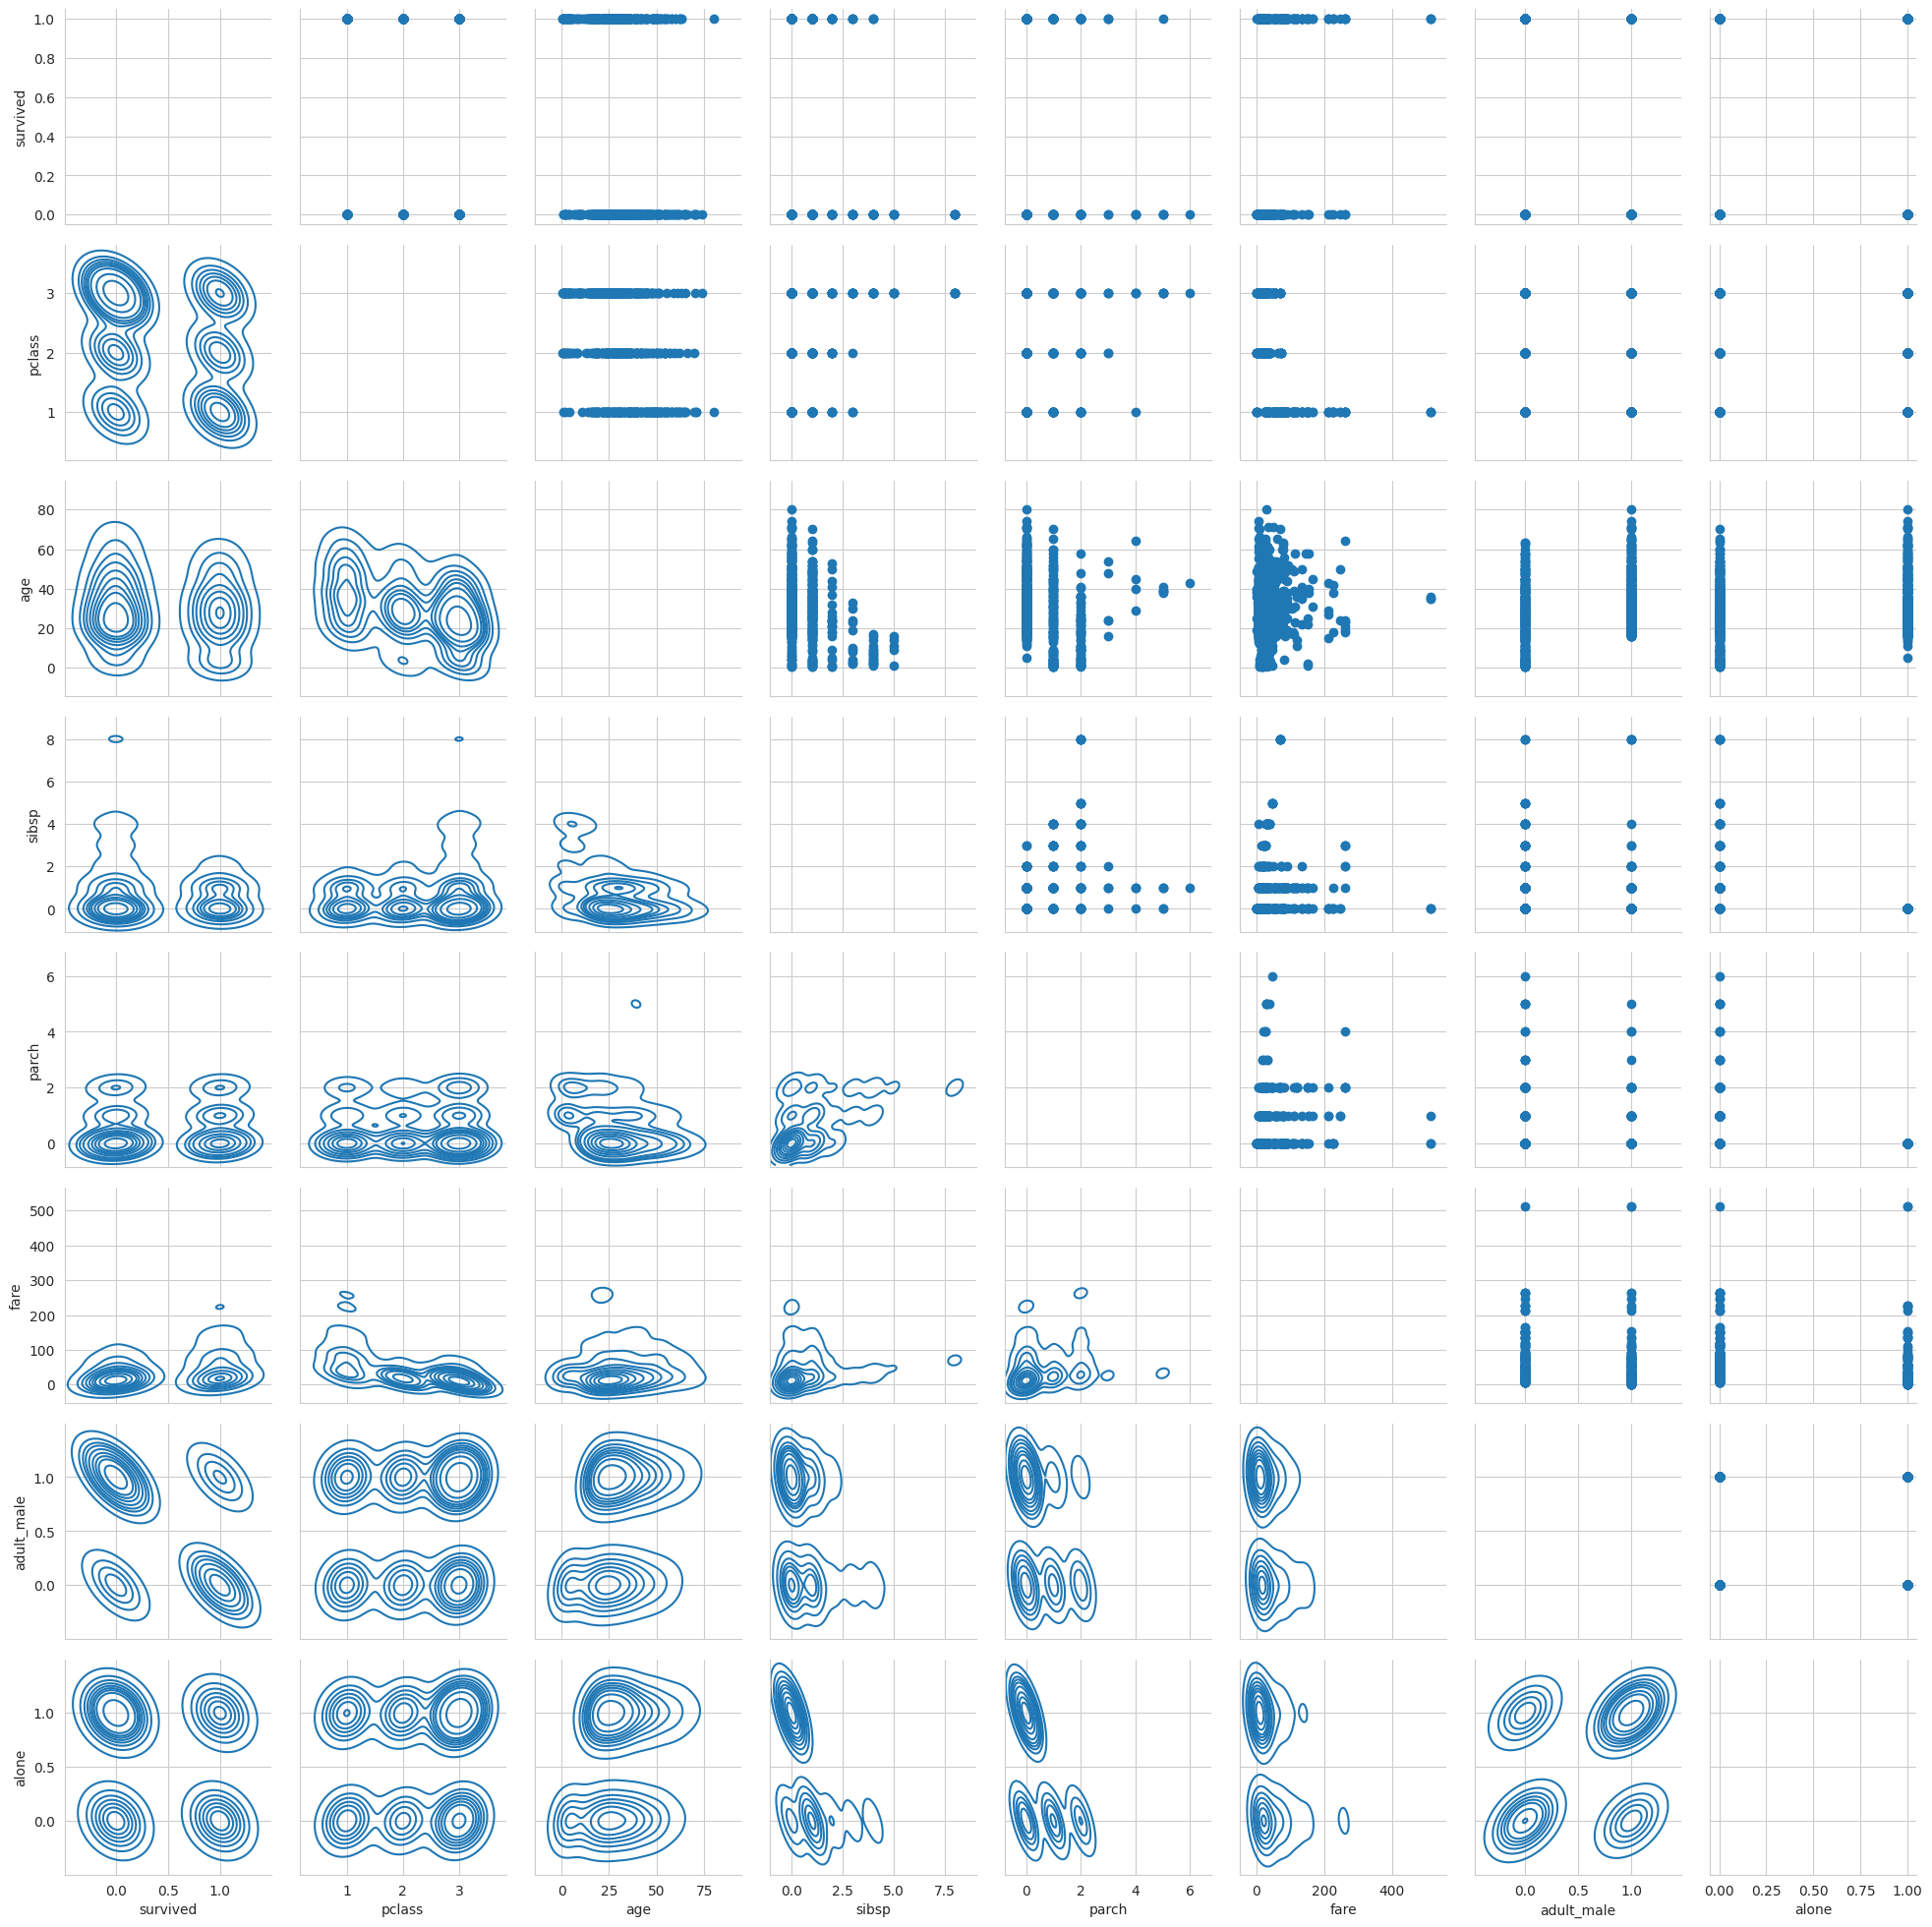

In [ ]:
sns.pairplot(titanic,hue='sex',palette='coolwarm')
g= sns.PairGrid(titanic)
g.map_diag(sns.displot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)